In [11]:
import numpy as np 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron,LogisticRegression
from sklearn.metrics import accuracy_score

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [12]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y= iris.target
print("class labels:" , np.unique(y))


# split test and train data 
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

print("label in y count ", np.bincount(y))
print("label in y test count ", np.bincount(y_test))
print("label in y train count ", np.bincount(y_train))


# feature scaling
sc=StandardScaler()
sc.fit(X_train)

X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

ppn=Perceptron(eta0=0.1,random_state=1)
ppn.fit(X_train_std,y_train)

y_pred=ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())


class labels: [0 1 2]
label in y count  [50 50 50]
label in y test count  [15 15 15]
label in y train count  [35 35 35]
Misclassified examples: 1


In [13]:
# we can see that the perceptron misclassifies 1 out of the 45 flower examples. Thus,
# the misclassification error on the test dataset is approximately 0.022, or 2.2 percent
# (1/45 ≈ 0.022).


# Instead of the misclassification error, many machine learning practitioners report the
# classification accuracy of a model, which is simply calculated as follows:
# 1–error = 0.978, or 97.8 percent


print ("Accuracy of the perceptron model:" ,accuracy_score(y_test,y_pred))
# Alternatively, each classifier in scikit-learn has a score method, which computes a classifier’s prediction
# accuracy by combining the predict call with accuracy_score

print("Accuracy score:",ppn.score(X_test_std,y_test))

Accuracy of the perceptron model: 0.9777777777777777
Accuracy score: 0.9777777777777777


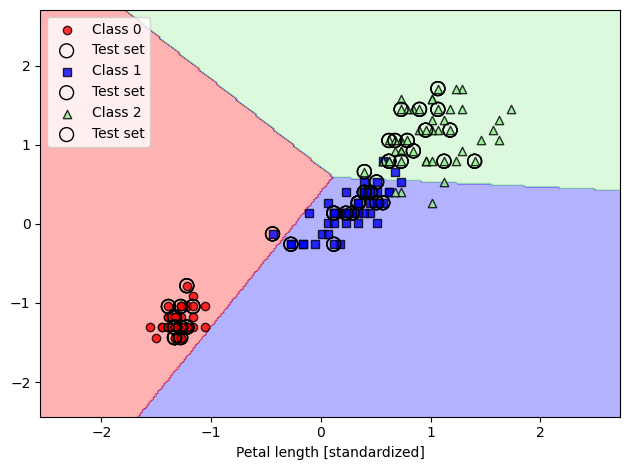

In [14]:
# now let's write code for visualizations
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    # setup marker gernerator and color
    markers = ("o","s","^","<")
    colors=("red","blue","lightgreen","gray","cyan")
    cmap=ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')
        # highlight test examples
        if test_idx:
            # plot all examples
            X_test, y_test = X[test_idx, :], y[test_idx]
            plt.scatter(X_test[:, 0], X_test[:, 1],
            c='none', edgecolor='black', alpha=1.0,
            linewidth=1, marker='o',
            s=100, label='Test set')


X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
y=y_combined,
classifier=ppn,
test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()




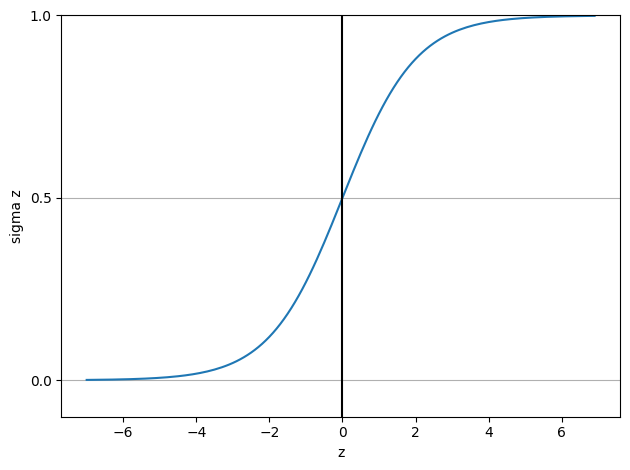

In [15]:
# the perceptron algorithm never converges
# on datasets that aren’t perfectly linearly separable, which is why the use of the perceptron algorithm is
# typically not recommended in practice.



# let plot sigmoid function for values -7 to 7

#  this sigmoid function takes real-number values as input and transforms
# them into values in the range [0, 1] with an intercept at 𝜎𝜎(0) = 0.5.
def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.arange(-7,7,0.1)
sigma_z=sigmoid(z)

plt.plot(z,sigma_z)
plt.axvline(0.0,color="k")
plt.ylim(-0.1,0.1)
plt.xlabel("z")
plt.ylabel("sigma z")
plt.yticks([.0,.5,1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()



/mnt/c9f28c3e-b27b-4e9a-9ba4-cf62e6a3b171/ml-stuff/perceptron/perceptron-scratch/my_virtual_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


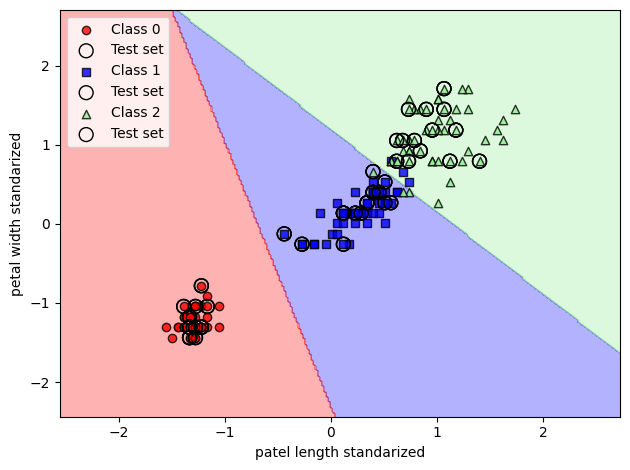

In [16]:
# logistic regression model using sciket learn.


lr=LogisticRegression(C=100.0,solver="lbfgs",multi_class="ovr")
lr.fit(X_train_std,y_train)
plot_decision_regions(
    X_combined_std,
    y_combined,
    classifier=lr,
    test_idx=range(105,150)
)

plt.xlabel("patel length standarized")
plt.ylabel("petal width standarized")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [17]:
lr.predict_proba(X_test_std[:3, :])
# The first row corresponds to the class membership probabilities of the first flower, the second row
# corresponds to the class membership probabilities of the second flower, and so forth
# lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)
# lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([[6.63770505e-09, 1.44747233e-01, 8.55252760e-01],
       [8.34031210e-01, 1.65968790e-01, 3.20815954e-13],
       [8.48822884e-01, 1.51177116e-01, 2.57998350e-14]])

OVERFITTING: Performs well on test data but not on unseen data. | high variance, caused by too many parameters and makes the model too complex
UNDERFITTING: Model not enough complex to capture the pattern. | low performce on unseen data | high bias, caused by too few parameters

“high variance” is proportional to overfitting and "high bias” is proportional to underfitting.


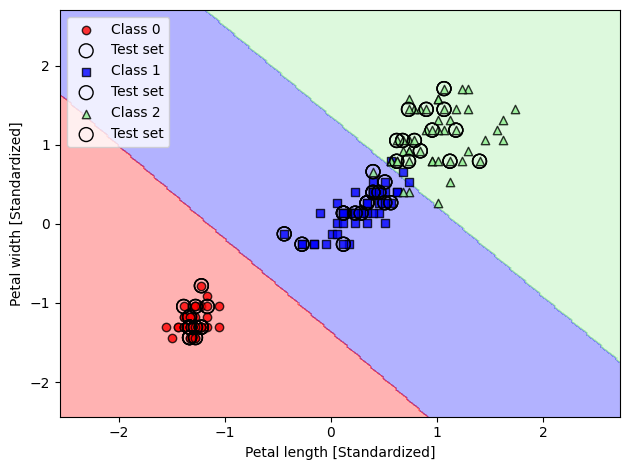

In [20]:
# SVM 

svm = SVC(kernel="linear",C=1.0, random_state=1)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel("Petal length [Standardized]")
plt.ylabel("Petal width [Standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()